#LAB 2. APPLICATIONS OF EIGENVECTORS
### Diana Aldoshyna

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA

## Task 1: Computing Eigenvalues and Eigenvectors of a Matrix
Write a function that takes a square matrix and returns its eigenvalues and eigenvectors.

Also verify the equality A⋅v=λ⋅v for each eigenvalue and
corresponding eigenvector.

In [96]:
matrix = np.matrix([[4, 1, 0], [0, 4, 0], [0, 0, 2]])

eigenvalues, eigenvectors = np.linalg.eig(matrix)
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

print("Matrix: ")
print(matrix)

print("\nEigenvalues: ")
print(eigenvalues)

print("\nEigenvectors: ")
print(eigenvectors)

# for i in range(0, eigenvectors.shape[1]):
#   vector = eigenvectors[:,i]
#   print (f"\n matrix * eigenvector{i+1} = \n{matrix @ vector}")
#   print (f"\n eigenvalue{i+1} * eigenvector{i+1} = \n{eigenvalues[i] * vector}")

print("\n     Verifying:")

for i in range(0, eigenvectors.shape[1]):
  vector = eigenvectors[:,i]
  print (f"\n     matrix * eigenvector{i+1} = {(matrix @ vector).T} = {(eigenvalues[i] * vector).T} = eigenvalue{i+1} * eigenvector{i+1}")


Matrix: 
[[4 1 0]
 [0 4 0]
 [0 0 2]]

Eigenvalues: 
[4. 4. 2.]

Eigenvectors: 
[[ 1.0000000e+00 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  8.8817842e-16  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]

     Verifying:

     matrix * eigenvector1 = [[4. 0. 0.]] = [[4. 0. 0.]] = eigenvalue1 * eigenvector1

     matrix * eigenvector2 = [[-4.00000000e+00  3.55271368e-15  0.00000000e+00]] = [[-4.00000000e+00  3.55271368e-15  0.00000000e+00]] = eigenvalue2 * eigenvector2

     matrix * eigenvector3 = [[0. 0. 2.]] = [[0. 0. 2.]] = eigenvalue3 * eigenvector3


##Task 2: Implementation of Image Dimensionality Reduction Using Principal Component Analysis (PCA)

1. Display the original color image and a vector that will contain: image dimensions in pixels and the number of main color channels used.

Image size and the number of color channels: (2000, 3000, 3) 



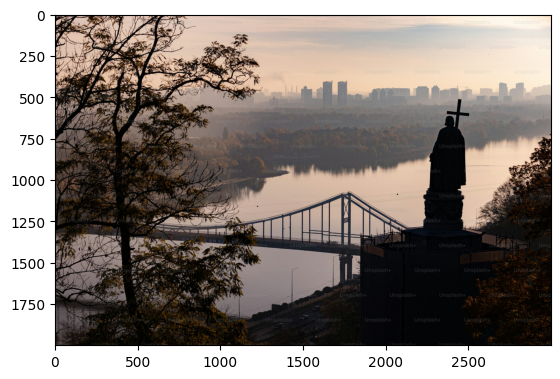

In [97]:
image_raw = imread("kyiv.jpeg")
print(f"Image size and the number of color channels: {image_raw.shape} \n")

plt.imshow(image_raw)

2. Convert the image to black and white and display the image size and number of
color channels (0.25 points)

Image size: (2000, 3000) 

Number of color channels: 1.0 



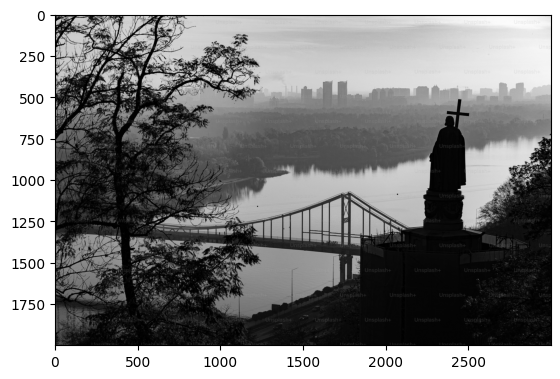

In [98]:
image_sum = image_raw.sum(axis=2)
print(f"Image size: {image_sum.shape} \n")

image_bw = image_sum/image_sum.max()
print(f"Number of color channels: {image_bw.max()} \n")

plt.imshow(image_bw, cmap='gray')

3. Apply PCA to the image_bw component matrix. Display cumulative variance
and find the number of components needed to cover 95% of the variance (0.75 points)

In [99]:
pca = PCA()
pca.fit_transform(image_bw)

#print(f"variance_ratio: {pca.explained_variance_ratio_}")
#print(f"\ncomponents: {pca.components_}")

array([[ 2.09386741e+01,  3.04632641e+00, -5.82519103e-01, ...,
         6.07636627e-05, -3.81573167e-05,  2.59159048e-14],
       [ 2.10333069e+01,  3.01906169e+00, -5.07782859e-01, ...,
        -2.47543572e-04,  1.65885260e-04,  2.59159048e-14],
       [ 2.10804626e+01,  3.02459508e+00, -5.18299322e-01, ...,
         4.46166782e-04, -2.87033466e-04,  2.59159048e-14],
       ...,
       [-1.74774909e+01,  2.35555516e+00,  4.23651683e+00, ...,
        -6.80814640e-04,  4.47548177e-04,  2.59159048e-14],
       [-1.71458055e+01,  2.38500243e+00,  4.13817734e+00, ...,
         4.58288420e-04, -4.25690926e-04,  2.59159048e-14],
       [-1.68983443e+01,  2.45754909e+00,  4.02562821e+00, ...,
        -1.30290375e-04,  2.28061108e-04,  2.59159048e-14]])

In [100]:
def index_of_el_that_equals_095(cum_list):
  for i in range(0, cum_list.shape[0]):
    if cum_list[i]>0.95:
      return i

cumulative_var = np.cumsum(pca.explained_variance_ratio_)
componenents_to_cover_95 = index_of_el_that_equals_095(cumulative_var) + 1

print(f"Cumulative variance: \n{cumulative_var}\n")
print(f"Number of componenets necessary to cover 95% of the variance: {componenents_to_cover_95}")

Cumulative variance: 
[0.58115982 0.66878909 0.72732547 ... 1.         1.         1.        ]

Number of componenets necessary to cover 95% of the variance: 114


Display a graph of the corresponding process (additional 0.5 points)

Text(124, 0.93, '(144, 0.95)')

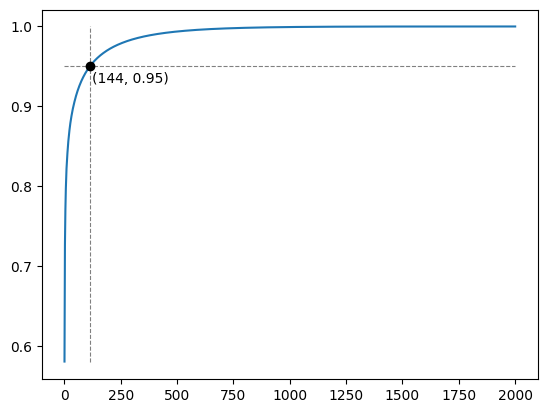

In [101]:
plt.figure()
plt.plot(range(1, 2001), cumulative_var)
plt.plot([0, 2000], [0.95, 0.95], linestyle='--', linewidth=0.8, color="grey")
plt.plot([componenents_to_cover_95, componenents_to_cover_95], [0.58, 1], linestyle='--', linewidth=0.8, color="grey")
plt.plot([componenents_to_cover_95], [0.95], marker='o', color="black")
plt.text(componenents_to_cover_95+10, 0.93, s="(144, 0.95)")

Reconstruct the black and white image using the limited number of components found in the previous step. Display the resulting image (1 point)

Text(0.5, 1.0, '114 components (covering 95% of the variance)')

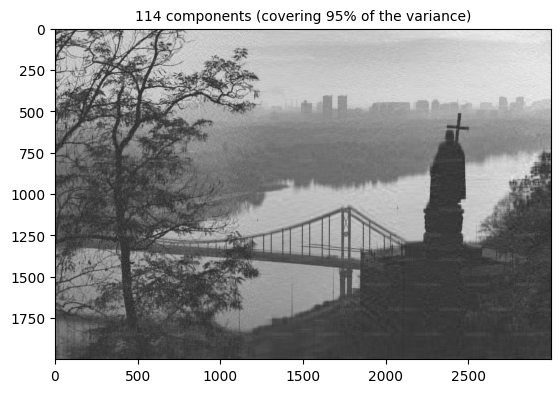

In [102]:
image_transformed = pca.transform(image_bw)

image_transformed_95 = image_transformed[:, :componenents_to_cover_95]
image_approx = image_transformed_95 @ pca.components_[:componenents_to_cover_95, :]
image_approx += pca.mean_

plt.imshow(image_approx, cmap='gray')
plt.title(f"{componenents_to_cover_95} components (covering 95% of the variance)", fontsize=10)

4. Reconstruct the image for different numbers of components and display the
corresponding results (2 points)

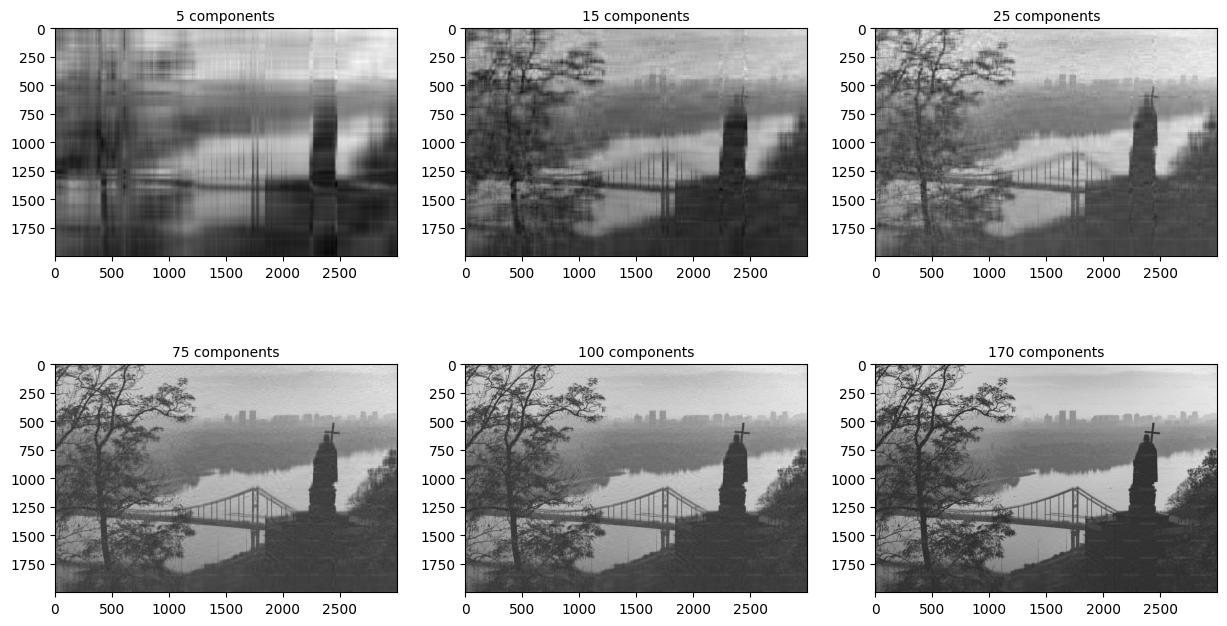

In [103]:
image_transformed = pca.transform(image_bw)
components_list = [5, 15, 25, 75, 100, 170]
components_list_index = 0

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i in range(0,2):
  for j in range(0,3):
    num_componenets = components_list[components_list_index]
    components_list_index+=1
    image_transformed_partially = image_transformed[:, :num_componenets]
    image_approx = image_transformed_partially @ pca.components_[:num_componenets, :]
    image_approx += pca.mean_
    axes[i,j].imshow(image_approx, cmap='gray')
    axes[i,j].set_title(f"{num_componenets} components", fontsize=10)

##Task 3: Using Diagonalization, Eigenvalues and Eigenvectors in Cryptography

In [104]:
def encrypt_message(message, key_matrix):
  message_vector = np.array([ord(char) for char in message])
  eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
  diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
  encrypted_vector = np.dot(diagonalized_key_matrix, message_vector)
  return encrypted_vector


1. Create a function `decrypt_message(encrypted_vector, key_matrix)`
that decrypts the encrypted vector encrypted_vector using the key matrix
key_matrix, using the inverse diagonalization operation

In [105]:
def decrypt_message(encrypted_vector, key_matrix):
  eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
  mattrix = np.dot(np.dot(eigenvectors, np.linalg.inv(np.diag(eigenvalues))), np.linalg.inv(eigenvectors))
  message_vector = np.dot(mattrix, encrypted_vector)
  message = "".join([chr(round(np.real(num))) for num in message_vector])
  return message

2. Verify the operation of the developed functions using an example of a randomly generated key matrix and text message

In [106]:
message = "my head hurts :("
key_matrix = np.random.randint(0, 256, (len(message), len(message)))

encrypted_vector = encrypt_message(message, key_matrix)
encrypted_vector

array([180026.+1.05125674e-11j, 162870.-2.87894438e-12j,
       193833.+3.54912439e-12j, 180441.+5.97029073e-12j,
       166541.+1.52282393e-11j, 171847.+4.65840835e-12j,
       140236.-1.33950396e-11j, 220183.-1.88962803e-11j,
       146177.+9.95264097e-12j, 123624.-1.29080333e-11j,
       196886.+8.17296590e-12j, 204568.+1.65925280e-11j,
       194212.+1.13529074e-12j, 174424.+1.34695424e-11j,
       204162.+3.29411643e-11j, 160211.-3.71373071e-12j])

In [107]:
message = decrypt_message(encrypted_vector, key_matrix)
message

'my head hurts :('